In [2]:
import tweepy
import pandas as pd
import time
import json
from IPython.display import display
import twint
import nest_asyncio
import matplotlib.pyplot as plt
import datetime
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import re
from textblob import TextBlob
import numpy as np
from wordcloud import WordCloud
import base64
import plotly.graph_objects as go
import sys
import plotly.graph_objects as go


In [3]:
app = JupyterDash(__name__)


In [4]:
nest_asyncio.apply()
tw = twint.Config()



In [5]:
# keys for auhtentication

consumer_key = "CXpaFOoz13HcbyJ93QSvnFT8b"
consumer_secret = "cH0eWice4s8Q01ErdgHG61NJuUErX2t5sJkrx9M8vETiUHJtZ1"
access_token = "1338795214375305217-sM5OfPQItexcy1bQNFCDFcGXSU7Jyf"
access_token_secret = "Acb33et5nAhahfYLD3mqNRFCfkJ9Anpshuy9RmSNOrL23"

# function to clean up text
def preProcess(text_arg):
    text_arg = re.sub(r'@[A-Za-z0-9]+' , '' , text_arg)
    text_arg = re.sub(r'#' , '' , text_arg)
    text_arg = re.sub(r'RT[\s]+' , '' , text_arg)
    text_arg = re.sub(r'https?:\/\/\S+' , '' , text_arg)
    
    return text_arg

In [6]:
# authentication keys for tweepy and pwitter api interaction

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [1]:
# -- This is the code to get the top trend in Hyderabad using tweepy's trends_place
# Do not uncomment as trend will be different at the time of running
# The hashtag obtained was #INDvsAUS

INDIA_WOEID = 23424848
GLOBAL_WOEID = 1
trends_object_india = api.trends_place(id = INDIA_WOEID)
trends_object_world = api.trends_place(id = GLOBAL_WOEID)
print(trends_object_india)
print(trends_object_world)
# print(json.dumps(trends_object , indent=1))

# only_hashtags = []
# for i in trends_object[0]['trends']:
#     if i['name'].startswith('#'):
#         only_hashtags.append(i['name'])



# top_trend = only_hashtags[0]

NameError: name 'api' is not defined

First 5 tweets collected



id      conversation_id                created_at  \
0  1339469028553682944  1339469028553682944 2020-12-17 12:44:37+05:30   
1  1339469012900691969  1339469012900691968 2020-12-17 12:44:33+05:30   
2  1339469004071526401  1339469004071526400 2020-12-17 12:44:31+05:30   
3  1339468996412723200  1339468996412723200 2020-12-17 12:44:29+05:30   
4  1339468989613944832  1339468989613944832 2020-12-17 12:44:27+05:30   

        date      time  timezone              user_id      username  \
0 2020-12-17  12:44:37       530  1043662202815705088   zeus66sport   
1 2020-12-17  12:44:33       530           3180882997  thelamershit   
2 2020-12-17  12:44:31       530            601095196      imamol97   
3 2020-12-17  12:44:29       530  1305188300009865217      brtki123   
4 2020-12-17  12:44:27       530  1339363862571868161     iniyavalu   

                  name place  \
0  ZEUS Cricket 🏏🇦🇺🇮🇳😎         
1             Abhishek         
2                 Amol         
3                Brtki         
4       இனியவள் இனியா🌝         

                                               tweet language  \
0  At the Adelaide Oval in 2018, Cheteshwar Pujar...       en   
1  Me watching Pujara bat at a strike rate of 19-...       en   
2  Pujara is giving life lessons! Stick to the wi...       en   
3  Nathan Lyon's bowling average in Australian Te...      und   
4     #INDvAUS on Trending🔥  https://t.co/ec29iC3jlr       en   

                                            mentions urls  \
0  [{'screen_name': 'kokeeffe49', 'name': 'kerry ...   []   
1                                                 []   []   
2                                                 []   []   
3                                                 []   []   
4                                                 []   []   

                                              photos  replies_count  \
0  [https://pbs.twimg.com/media/Epa_6RDUcAEPCgU.jpg]              0   
1  [https://pbs.twimg.com/media/Epa_92DW8AIVevH.jpg]              0   
2                                                 []              0   
3                                                 []              0   
4  [https://pbs.twimg.com/media/Epa_8RzXIAE1r-D.jpg]              0   

   retweets_count  likes_count  \
0               0            0   
1               0            0   
2               0            0   
3               0            0   
4               0            0   

                                            hashtags cashtags  \
0  [ausvind, indvaus, pujara, india, adelaide, cr...       []   
1                                          [indvaus]       []   
2                                          [indvaus]       []   
3                                          [indvaus]       []   
4                                          [indvaus]       []   

                                                link  retweet quote_url  \
0  https://twitter.com/Zeus66sport/status/1339469...    False             
1  https://twitter.com/thelamershit/status/133946...    False             
2  https://twitter.com/Imamol97/status/1339469004...    False             
3  https://twitter.com/Brtki123/status/1339468996...    False             
4  https://twitter.com/iniyavalu/status/133946898...    False             

   video                                        thumbnail near geo source  \
0      1  https://pbs.twimg.com/media/Epa_6RDUcAEPCgU.jpg                   
1      1  https://pbs.twimg.com/media/Epa_92DW8AIVevH.jpg                   
2      0                                                                    
3      0                                                                    
4      1  https://pbs.twimg.com/media/Epa_8RzXIAE1r-D.jpg                   

  user_rt_id user_rt retweet_id reply_to retweet_date translate trans_src  \
0                                     []                                    
1                                     []                                    
2                                  

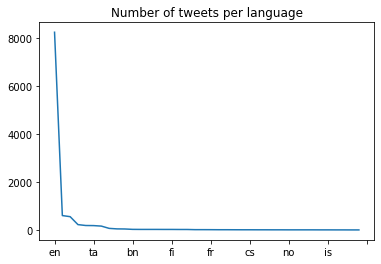

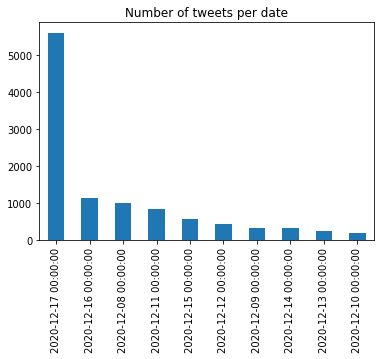

Date  Tweet_Count
0 2020-12-17         5609
1 2020-12-16         1119
2 2020-12-08         1000
3 2020-12-11          837
4 2020-12-15          566
5 2020-12-12          418
6 2020-12-09          322
7 2020-12-14          304
8 2020-12-13          233
9 2020-12-10          177

Language  Count
0        en   8241
1        hi    599
2       und    553
3        in    222
4        mr    185
5        ta    181
6        et    160
7        tl     65
8        da     44
9        te     40
10       bn     24
11       cy     22
12       gu     22
13       es     22
14       ht     21
15       fi     21
16       de     19
17       kn     19
18       or     12
19       pt     12
20       fr     11
21       nl      9
22       ml      9
23       ne      8
24       ca      7
25       cs      7
26       ro      6
27       ur      6
28       sl      5
29       pl      5
30       no      4
31       sv      4
32       hu      4
33       eu      4
34       it      3
35       is      3
36       lt      2
37       lv      2
38       si      1
39       ar      1

In [6]:

# reading the collected tweets
# tweets were collected using twint on the command line - twint -s "#INDvsAUS" --limit 11000
tweets_df = pd.read_json("./tweet_data.json" , lines=True)
pd.options.display.max_columns = 100

tweets_df = tweets_df.drop_duplicates(subset=['id'])
tweets_df.index = range(len(tweets_df))
# print(tweets_df.shape)
print("First 5 tweets collected\n")
display(tweets_df.head())

# initial test plots for per date tweets
tweets_df['language'].value_counts().plot()
plt.title('Number of tweets per language')
plt.show()
tweets_df['date'].value_counts().plot(kind='bar')
plt.title('Number of tweets per date')
plt.show()

# tweets_df.info()

df_series = tweets_df['date'].value_counts()
date_freq = df_series.to_frame()
date_freq = date_freq.reset_index()
date_freq.columns = ['Date' , 'Tweet_Count']
display(date_freq)

df_series = tweets_df['language'].value_counts()
lang_freq = df_series.to_frame()
lang_freq = lang_freq.reset_index()
lang_freq.columns = ['Language','Count']
display(lang_freq)


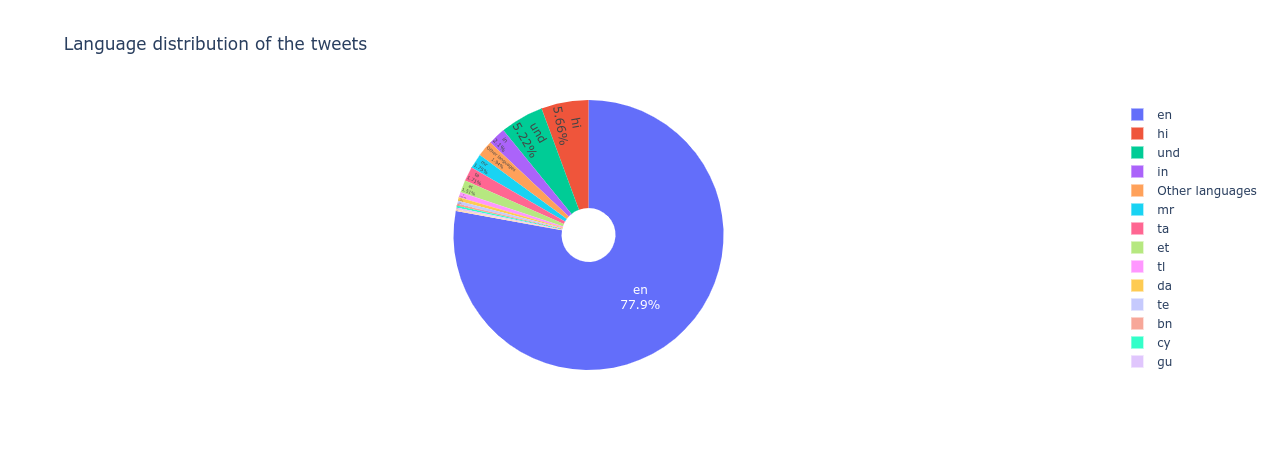

In [7]:

# Plotting tweets per language as a pie chart
date_freq.sort_values(by=['Date'] , inplace=True)

lang_df_copy = lang_freq.copy()
lang_df_copy.loc[lang_df_copy['Count'] < 22, 'Language'] = 'Other languages'

lang_fig = px.pie(lang_df_copy , values='Count' , names='Language' , title='Language distribution of the tweets' , hole=.2)
lang_fig.update_traces(textposition='inside', textinfo='percent+label')


In [8]:

# --- THE CODE TO COLLECT USRS WHO TWEETED ABOUT THE HASHTAG ---
# ---Do not uncomment as thiw had to be run only once and stored in a json file ---
# user_objs = []


# for name in username_list:
#     try:
#         obj = api.get_user(name)
#         print("{} is done".format(name))
#         user_objs.append([obj.name,obj.followers_count,   obj.verified,   obj.friends_count , obj.location, obj.statuses_count])
#     except tweepy.TweepError as e:
#         print(e)
        
# users_df = pd.DataFrame(user_objs)
# users_df.columns = ['Name', 'Followers', 'Verified', 'Friends',  'Location', 'Tweets']
# users_df.drop_duplicates(subset=['ID'] , inplace=True)
        
# out = df.to_json(orient='records')[1:-1].replace('},{', '}\n {')

# with open('./user.json', 'w') as f:
#     f.write(out)

# --- ---

# reading user data in a dataframe
user_df = pd.read_json("./user.json" , lines=True)
pd.options.display.max_columns = 100

print("First 10 Users")
display(user_df[:10])



First 10 Users


Name  Followers  Verified  Friends              Location  Tweets
0  Sexyano_Donaldo       2607     False      970  Washington DC, Nepal   32221
1  interviewtimes2        134     False       28         Bhubaneshwar     1357
2   NarayanShastri        788     False     2518    ಬೆಂಗಳೂರು Bengaluru   53515
3  iamritikagarwal          1     False      144                           559
4         Oneindia      64296      True      619                 India  365502
5     DadhaniyaJit        141     False      326         Upleta, India    1120
6       IrFaN_MhD_       2187     False     2221         Kerala, India   10179
7     Rajneesh1697         39     False      210           Pune, India     153
8       Virat12479        162     False      275                          7425
9      AnirudhDutt          8     False       50                          1904

In [9]:

# coverting to datetime.time
tweets_df['time'] = tweets_df['time'].apply(lambda x: 
                                    datetime.datetime.strptime(x,'%H:%M:%S').time())

In [10]:

#converting to datetime

tweets_df['date'] = tweets_df['date'].apply(lambda x: datetime.date(x.year,x.month,x.day))


In [11]:
# dataframe for showing sentiment , polarity and subjectivity of tweets

tweets_sentiment = tweets_df.copy()
tweets_sentiment = tweets_sentiment[tweets_sentiment['language'] == 'en']
tweets_sentiment['tweet'] = tweets_sentiment['tweet'].apply(preProcess)

tweets_sentiment['Polarity'] = tweets_sentiment['tweet'].apply(lambda x : TextBlob(x).sentiment.polarity) 
tweets_sentiment['Subjectivity'] = tweets_sentiment['tweet'].apply(lambda x : TextBlob(x).sentiment.subjectivity) 

sentiments = []
for pol in tweets_sentiment['Polarity']:
    if pol > 0:
        sentiments.append('Positive')
    elif pol < 0:
        sentiments.append('Negative')
    else:
        sentiments.append('Neutral')


tweets_sentiment['Sentiment'] = sentiments

print("First 5 tweets with their sentiments")
display(tweets_sentiment.head())

First 5 tweets with their sentiments


id      conversation_id                created_at  \
0  1339469028553682944  1339469028553682944 2020-12-17 12:44:37+05:30   
1  1339469012900691969  1339469012900691968 2020-12-17 12:44:33+05:30   
2  1339469004071526401  1339469004071526400 2020-12-17 12:44:31+05:30   
4  1339468989613944832  1339468989613944832 2020-12-17 12:44:27+05:30   
5  1339468989181829120  1339468989181829120 2020-12-17 12:44:27+05:30   

         date      time  timezone              user_id      username  \
0  2020-12-17  12:44:37       530  1043662202815705088   zeus66sport   
1  2020-12-17  12:44:33       530           3180882997  thelamershit   
2  2020-12-17  12:44:31       530            601095196      imamol97   
4  2020-12-17  12:44:27       530  1339363862571868161     iniyavalu   
5  2020-12-17  12:44:27       530   927794002790825985  rishabhm9997   

                  name place  \
0  ZEUS Cricket 🏏🇦🇺🇮🇳😎         
1             Abhishek         
2                 Amol         
4       இனியவள் இனியா🌝         
5     Rishabh Malhotra         

                                               tweet language  \
0  At the Adelaide Oval in 2018, Cheteshwar Pujar...       en   
1  Me watching Pujara bat at a strike rate of 19-...       en   
2  Pujara is giving life lessons! Stick to the wi...       en   
4                             INDvAUS on Trending🔥         en   
5  Wake me up india will hit another boundary.IND...       en   

                                            mentions urls  \
0  [{'screen_name': 'kokeeffe49', 'name': 'kerry ...   []   
1                                                 []   []   
2                                                 []   []   
4                                                 []   []   
5                                                 []   []   

                                              photos  replies_count  \
0  [https://pbs.twimg.com/media/Epa_6RDUcAEPCgU.jpg]              0   
1  [https://pbs.twimg.com/media/Epa_92DW8AIVevH.jpg]              0   
2                                                 []              0   
4  [https://pbs.twimg.com/media/Epa_8RzXIAE1r-D.jpg]              0   
5                                                 []              0   

   retweets_count  likes_count  \
0               0            0   
1               0            0   
2               0            0   
4               0            0   
5               0            0   

                                            hashtags cashtags  \
0  [ausvind, indvaus, pujara, india, adelaide, cr...       []   
1                                          [indvaus]       []   
2                                          [indvaus]       []   
4                                          [indvaus]       []   
5                                          [indvaus]       []   

                                                link  retweet quote_url  \
0  https://twitter.com/Zeus66sport/status/1339469...    False             
1  https://twitter.com/thelamershit/status/133946...    False             
2  https://twitter.com/Imamol97/status/1339469004...    False             
4  https://twitter.com/iniyavalu/status/133946898...    False             
5  https://twitter.com/Rishabhm9997/status/133946...    False             

   video                                        thumbnail near geo source  \
0      1  https://pbs.twimg.com/media/Epa_6RDUcAEPCgU.jpg                   
1      1  https://pbs.twimg.com/media/Epa_92DW8AIVevH.jpg                   
2      0                                                                    
4      1  https://pbs.twimg.com/media/Epa_8RzXIAE1r-D.jpg                   
5      0                                                                    

  user_rt_id user_rt retweet_id reply_to retweet_date translate trans_src  \
0                                     []                                    
1                                     []                                    
2                            

In [12]:
# sentiment plots (down in inline dash app)
sub_pol = px.scatter(tweets_sentiment, x="Polarity", y="Subjectivity" , render_mode='svg')

                  
sub_pol_sent = px.scatter(tweets_sentiment, x="Polarity", y="Subjectivity",color="Sentiment" , render_mode='svg')

sub_pol_sz = px.scatter(tweets_sentiment, x="Polarity", y="Subjectivity",size="likes_count" , render_mode='svg')

sub_pol_sent_sz = px.scatter(tweets_sentiment, x="Polarity", y="Subjectivity",size="likes_count" , color="Sentiment" , render_mode='svg')


In [13]:
tweets_sent = tweets_sentiment.groupby(['Sentiment'])["id"].count().reset_index(name="count")
print("Number of tweets per Sentiment")
display(tweets_sent)

Number of tweets per Sentiment


Sentiment  count
0  Negative   1115
1   Neutral   3238
2  Positive   3888

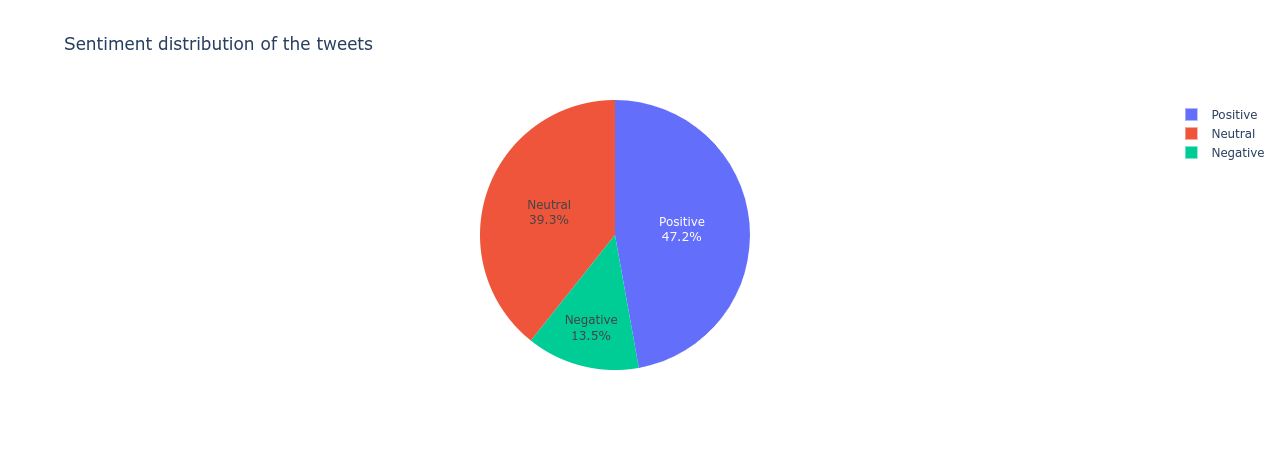

In [14]:

#Pie chart for Sentiment
sent_fig = px.pie(tweets_sent , values='count' , names='Sentiment' , title='Sentiment distribution of the tweets')
sent_fig.update_traces(textposition='inside', textinfo='percent+label')

In [15]:
# Getting top 3 Positive and Negative tweets

pos_tweets = tweets_sentiment[tweets_sentiment['Sentiment'] == 'Positive']
pos_tweets = pos_tweets.sort_values(by=['Polarity'] , ascending=False)
pos_tweets = pos_tweets.reset_index()
pos_tweets = pos_tweets['tweet'][:3]

neg_tweets = tweets_sentiment[tweets_sentiment['Sentiment'] == 'Negative']
neg_tweets = neg_tweets.sort_values(by=['Polarity'])
neg_tweets = neg_tweets.reset_index()
neg_tweets = neg_tweets['tweet'][:3]

In [16]:
# Getting the day of December 2020 and hour of day for the tweets

tweet_datetime_df = tweets_df.filter(['id','date','time'], axis=1)
dates = []
dates = tweet_datetime_df['date'].to_list()
days = []
for i in range(len(dates)):
    days.append(dates[i].day)

tweet_datetime_df['day'] = days
tweet_datetime_df[230:9000]
tweet_datetime_df['hour'] = tweet_datetime_df.apply(lambda row: row.time.hour, axis = 1)
print("Tweets along side day and hour")
tweet_datetime_df.head()

Tweets along side day and hour


id        date      time  day  hour
0  1339469028553682944  2020-12-17  12:44:37   17    12
1  1339469012900691969  2020-12-17  12:44:33   17    12
2  1339469004071526401  2020-12-17  12:44:31   17    12
3  1339468996412723200  2020-12-17  12:44:29   17    12
4  1339468989613944832  2020-12-17  12:44:27   17    12

In [17]:

tweet_day_hour = tweet_datetime_df.groupby(["day", "hour"])["id"].count().reset_index(name="count")
print("Number of tweets per day and hour")
display(tweet_day_hour)


Number of tweets per day and hour


day  hour  count
0      8    17    551
1      8    18    211
2      8    19     84
3      8    20     33
4      8    21     56
..   ...   ...    ...
194   17     8    318
195   17     9   2576
196   17    10    832
197   17    11   1044
198   17    12    662

[199 rows x 3 columns]

In [18]:
# Number of tweets per time of day (Morning , Afternoon , Evening , Night)

tweet_day_hour['Day_of_Time'] = ''

hours_array = tweet_day_hour['hour'].to_list()
day_of_times = []
for h in hours_array:
    if h >= 3 and h < 12:
        day_of_times.append('Morning')
    elif h >= 12 and h < 16:
        day_of_times.append('Afternoon')
    elif h >= 16 and h < 20:
        day_of_times.append('Evening')
    elif h >= 20 or h < 3:
        day_of_times.append('Night')

# print(day_of_times)

In [19]:
tweet_day_hour['Day_of_Time'] = day_of_times
display(tweet_day_hour)

day  hour  count Day_of_Time
0      8    17    551     Evening
1      8    18    211     Evening
2      8    19     84     Evening
3      8    20     33       Night
4      8    21     56       Night
..   ...   ...    ...         ...
194   17     8    318     Morning
195   17     9   2576     Morning
196   17    10    832     Morning
197   17    11   1044     Morning
198   17    12    662   Afternoon

[199 rows x 4 columns]

In [20]:
tweet_day_week = tweet_day_hour.groupby(["day", "Day_of_Time"])["count"].sum().reset_index(name="tweets")
print("Number of tweets per day and time of day")
display(tweet_day_week)

Number of tweets per day and time of day


day Day_of_Time  tweets
0     8     Evening     846
1     8       Night     154
2     9   Afternoon      82
3     9     Evening      42
4     9     Morning     132
5     9       Night      66
6    10   Afternoon      61
7    10     Evening      36
8    10     Morning      41
9    10       Night      39
10   11   Afternoon     380
11   11     Evening     190
12   11     Morning     191
13   11       Night      76
14   12   Afternoon      96
15   12     Evening     165
16   12     Morning      95
17   12       Night      62
18   13   Afternoon      65
19   13     Evening      62
20   13     Morning      59
21   13       Night      47
22   14   Afternoon      86
23   14     Evening      68
24   14     Morning      78
25   14       Night      72
26   15   Afternoon     143
27   15     Evening     145
28   15     Morning     140
29   15       Night     138
30   16   Afternoon     357
31   16     Evening     343
32   16     Morning     160
33   16       Night     259
34   17   Afternoon     662
35   17     Morning    4917
36   17       Night      30

In [21]:
# Preparing dataframe for Heatmap
days_unique = list(set(days))

idx_list = ['Morning' , 'Afternoon' , 'Evening' , 'Night']

dot_dict = {'Morning' : [] , 'Afternoon' : [] , 'Evening' : [] , 'Night' : []}
for idx in idx_list:
    for d in days_unique:
        res = tweet_day_week[(tweet_day_week['day'] == d) & 
          (tweet_day_week['Day_of_Time'] == idx)]
        
        res.reset_index(inplace=True)
        
        if len(res) == 0:
            dot_dict[idx].append(0)
        else:
            dot_dict[idx].append(res['tweets'][0])
        

In [22]:


cols = days_unique
idx = ['Morning' , 'Afternoon' , 'Evening' , 'Night']

heat_map_df =  pd.DataFrame([dot_dict['Morning'], dot_dict['Afternoon'],dot_dict['Evening'],dot_dict['Night']], 
                   columns = cols, index = idx)

print("Data for Heatmap")
display(heat_map_df)

Data for Heatmap


8    9   10   11   12  13  14   15   16    17
Morning      0  132  41  191   95  59  78  140  160  4917
Afternoon    0   82  61  380   96  65  86  143  357   662
Evening    846   42  36  190  165  62  68  145  343     0
Night      154   66  39   76   62  47  72  138  259    30

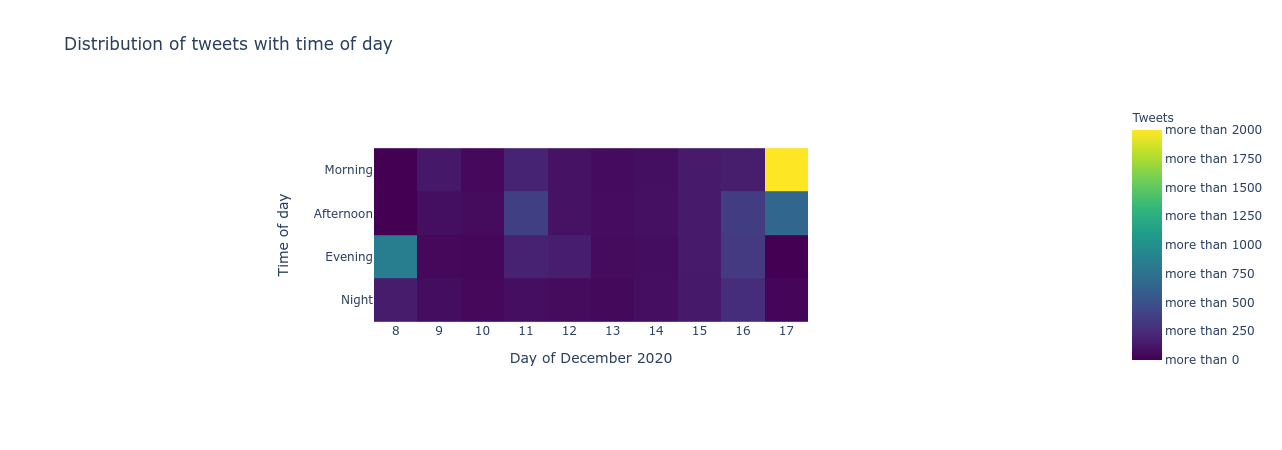

In [23]:
#Heat map for number of tweets per day and time of day

heat_fig = px.imshow(heat_map_df , 
                    labels=dict(x="Day of December 2020", y="Time of day", color="Tweets") ,
                     title = "Distribution of tweets with time of day",
                     color_continuous_scale = px.colors.sequential.Viridis,
                     range_color = [0,2000]
                    )
heat_fig.update_xaxes(type='category')
heat_fig.update_layout(coloraxis_colorbar=dict(
    yanchor="top", y=1,
    tickprefix="more than ",
    dtick=250
))
# heat_fig.show()

In [24]:
# User statistics
# Number of users per followers
user_stat = user_df.copy()
user_stat['groups']=pd.cut(user_df['Followers'],[0,10,50,100,500,1000 , 5000 , 10000 , 50000 , 100000 , 500000 , 1000000 , 10000000 , 100000000 , 10000000000])
# display(user_stat)
df_series = user_stat['groups'].value_counts()
user_freq = df_series.to_frame()
user_freq = user_freq.reset_index()
user_freq.columns = ['Followers' , 'User_Count']
# display(user_freq)

# Number of users per tweets by them
user_stat_tw = user_df.copy()
user_stat_tw['groups']=pd.cut(user_df['Tweets'],[0,10,50,100,500,1000 , 5000 , 10000 , 50000 , 100000 , 500000 , 1000000 , 10000000])
# display(user_stat_tw)
df_series = user_stat_tw['groups'].value_counts()
user_freq_tw = df_series.to_frame()
user_freq_tw = user_freq_tw.reset_index()
user_freq_tw.columns = ['Tweets' , 'User_Count']
# display(user_freq_tw)


In [25]:
# Method to convert interval into string
def conv_interval(itrvl):
    res = ''
    res = res + str(itrvl.left)
    res = res + '-'
    res = res + str(itrvl.right)
    
    return res


user_freq['Followers'] =  user_freq['Followers'].apply(conv_interval)
user_freq_tw['Tweets'] = user_freq_tw['Tweets'].apply(conv_interval)

user_freq = user_freq.sort_values(by=['Followers'])
user_freq_tw = user_freq_tw.sort_values(by=['Tweets'])
                                      
print("Users per followers")
display(user_freq)
print("Users per Tweets")
display(user_freq_tw)



Users per followers


Followers  User_Count
4                    0-10         733
1                   10-50        1240
3                  50-100         735
0                 100-500        1788
5                500-1000         590
2               1000-5000         869
7              5000-10000         134
6             10000-50000         148
9            50000-100000          29
8           100000-500000          53
10         500000-1000000          19
11       1000000-10000000          16
12     10000000-100000000           3
13  100000000-10000000000           0

Users per Tweets


Tweets  User_Count
9               0-10         127
5              10-50         330
7             50-100         270
2            100-500        1071
4           500-1000         593
0          1000-5000        1595
3         5000-10000         698
1        10000-50000        1297
6       50000-100000         303
8      100000-500000         194
10    500000-1000000           6
11  1000000-10000000           1

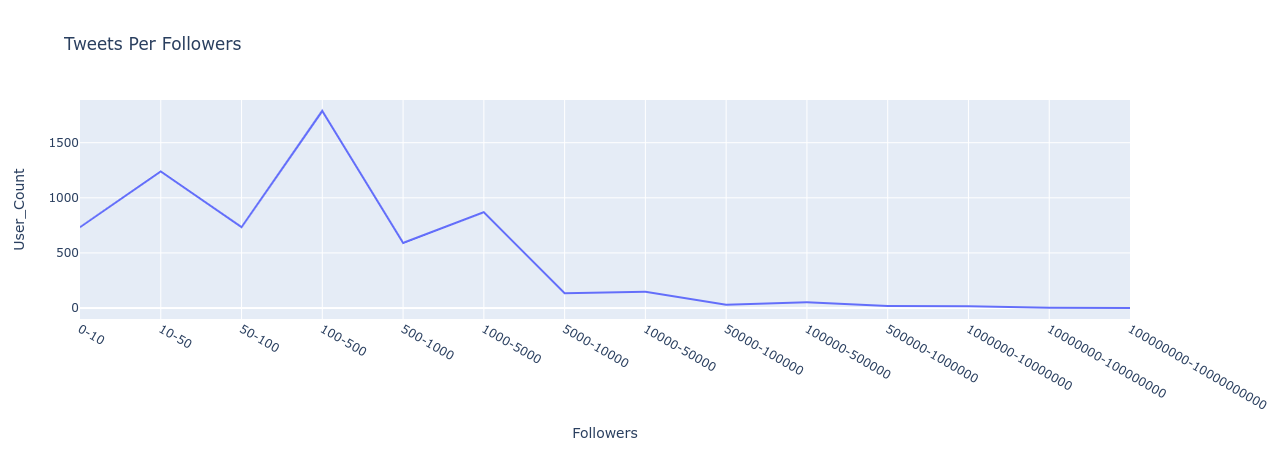

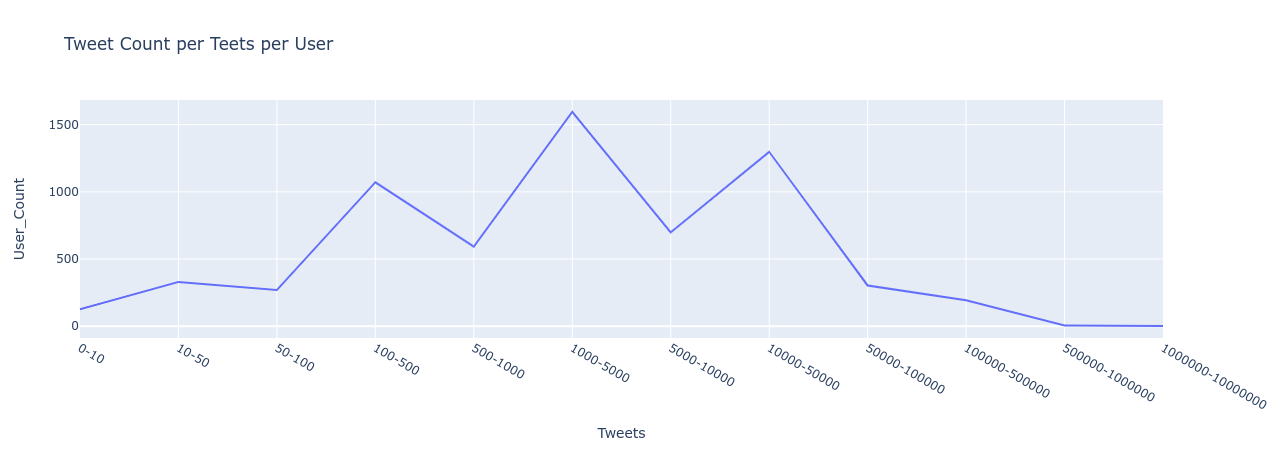

In [26]:
# Line graphs for user statistics

user_fig = px.line(
       user_freq,
       title='Tweets Per Followers',
       x="Followers" , y="User_Count"
    )

user_fig_tweet = px.line(
    user_freq_tw,
    title='Tweet Count per Teets per User',
    x="Tweets",y="User_Count"
)
user_fig.show()
user_fig_tweet.show()

In [27]:
#Verified and Unverified users

user_ver = user_df.copy()
df_series = user_ver['Verified'].value_counts()
user_ver = df_series.to_frame()
user_ver = user_ver.reset_index()
user_ver.columns = ['Verified' , 'User_Count']
def conv_ver(b):
    if b:
        return 'Verified'
    else:
        return 'Unverified'
    
user_ver['Verified'] = user_ver['Verified'].apply(conv_ver)

print("Verified/Unverified users")
display(user_ver)

Verified/Unverified users


Verified  User_Count
0  Unverified        6329
1    Verified         159

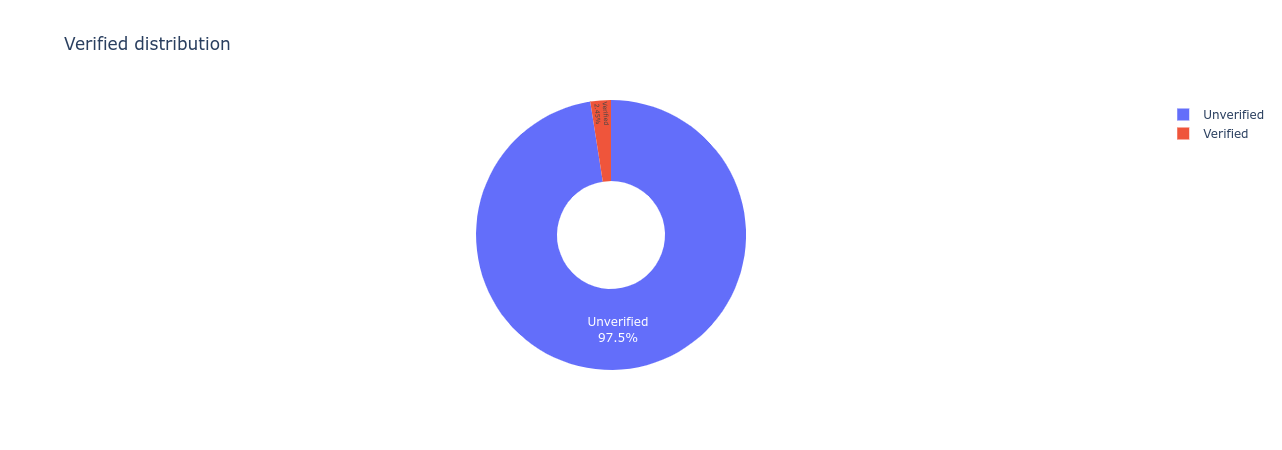

In [28]:
# Pie chart for verified and unverified
ver_fig = px.pie(user_ver , values='User_Count' , names='Verified' , title='Verified distribution',hole=.4)
ver_fig.update_traces(textposition='inside', textinfo='percent+label')

In [29]:
# --- Code for collecting top 10 tweets by first 1000 users ---
# --- Do not uncomment as this had to be run only once to store --

# user_tweets = []
# for id in tweets_df['user_id']:
#     try:
#         tweets = api.user_timeline(user_id=id , count=10,include_rts = False , tweet_mode = 'extended')
#         for tw in tweets:
#             user_tweets.append(tw.full_text)
#         print(id)
#     except tweepy.TweepError as e:
#         print(e)

# Cleaning up the data
# for i in range(len(user_tweets)):
#     user_tweets[i] = preProcess(user_tweets[i])
# # print(type(user_tweets[0]))

# user_words = ' '.join(user_tweets)
# # print(type(user_words))

# Saving it in a file
# text_file = open("user_words.txt", "w")
# text_file.write(user_words)
# text_file.close()


In [30]:
# Getting words data
f = open('user_words.txt' , "r")
content = f.read()
f.close()


In [31]:
# Generate word cloud
wordcloud = WordCloud(width=500 , height=500 , random_state=40 , max_font_size=119).generate(content)

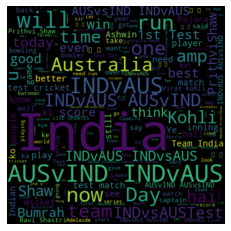

In [32]:
# saving word cloud to an image for use in dash
plt.imshow(wordcloud , interpolation="bilinear")
plt.axis('off')
plt.show()
wordcloud.to_file('wc.png')

In [33]:
encoded_wc = base64.b64encode(open('./wc.png', 'rb').read()).decode('ascii')

In [127]:
# Separating verified and unverified users
unver_users = user_df[user_df['Verified'] == False]
ver_users = user_df[user_df['Verified'] == True]
unver_users = list(unver_users['Name'])
ver_users = list(ver_users['Name'])


In [128]:
def is_ver(name):
    if name in ver_users:
        return 'Verified'
    else:
        return 'Unverified'

In [129]:
verun_tweets = tweets_sentiment.copy()
verun_tweets['Verified'] = verun_tweets['name'].apply(is_ver)

In [138]:
#Getting by decreasing likes count
sorted_verun = verun_tweets.sort_values('likes_count'  , ascending=False)
sorted_verun.reset_index(inplace=True)
ver_tweets = sorted_verun[sorted_verun['Verified'] == 'Verified']
unver_tweets = sorted_verun[sorted_verun['Verified'] == 'Unverified']
ver_tweets.reset_index(inplace=True)
unver_tweets.reset_index(inplace=True)
display(ver_tweets)
display(unver_tweets)

level_0  index                   id      conversation_id  \
0        17   9731  1336323262322679811  1336323262322679808   
1        35   5872  1339211530118680577  1339211530118680576   
2       120   6337  1339128003234656256  1339128003234656256   
3       212   8434  1337362004508610560  1337362004508610560   
4       219   5031  1339413334353981440  1339413334353981440   
..      ...    ...                  ...                  ...   
56     7398   6114  1339168393694482432  1339168393694482432   
57     7548   6816  1338868920804024324  1338868920804024320   
58     7741   4354  1339420436552065026  1339418638206394368   
59     7795   4526  1339418638206394368  1339418638206394368   
60     8187   5107  1339412669917323264  1339412669917323264   

                  created_at        date      time  timezone  \
0  2020-12-08 20:24:28+05:30  2020-12-08  20:24:28       530   
1  2020-12-16 19:41:24+05:30  2020-12-16  19:41:24       530   
2  2020-12-16 14:09:30+05:30  2020-12-16  14:09:30       530   
3  2020-12-11 17:12:03+05:30  2020-12-11  17:12:03       530   
4  2020-12-17 09:03:18+05:30  2020-12-17  09:03:18       530   
..                       ...         ...       ...       ...   
56 2020-12-16 16:50:00+05:30  2020-12-16  16:50:00       530   
57 2020-12-15 21:00:00+05:30  2020-12-15  21:00:00       530   
58 2020-12-17 09:31:31+05:30  2020-12-17  09:31:31       530   
59 2020-12-17 09:24:23+05:30  2020-12-17  09:24:23       530   
60 2020-12-17 09:00:40+05:30  2020-12-17  09:00:40       530   

                user_id     username         name place  \
0              71487564  cricketndtv  CricketNDTV         
1              71487564  cricketndtv  CricketNDTV         
2              71487564  cricketndtv  CricketNDTV         
3              71487564  cricketndtv  CricketNDTV         
4              71487564  cricketndtv  CricketNDTV         
..                  ...          ...          ...   ...   
56   896740409346371584     editorji     editorji         
57   896740409346371584     editorji     editorji         
58  1097735514977955845      fancode      FanCode         
59  1097735514977955845      fancode      FanCode         
60   896740409346371584     editorji     editorji         

                                                tweet language mentions  \
0   HardikPandya gave his Man of the Series award ...       en       []   
1   Virat Kohli said the birth of his first child ...       en       []   
2   India have announced their playing XI for the ...       en       []   
3   JaspritBumrah registered his maiden first-clas...       en       []   
4   1st Test: India captain Virat Kohli wins toss,...       en       []   
..                                                ...      ...      ...   
56  Australia has won all 7 pink-ball Tests so far...       en       []   
57  Check out the video as TeamIndia prepares for ...       en       []   
58  India XI: P Shaw, M Agarwal, C Pujara, V Kohli...       en       []   
59  It's time for the first Test match between Ind...       en       []   
60  JEE (Mains) to be held 4 times a year; Rich na...       en       []   

                                                 urls  \
0   [https://sports.ndtv.com/australia-vs-india-20...   
1   [https://sports.ndtv.com/australia-vs-india-20...   
2   [https://sports.ndtv.com/australia-vs-india-20...   
3   [https://sports.ndtv.com/australia-vs-india-20...   
4                            [https://bit.ly/3oZiTTx]   
..                                                ...   
56  [https://www.editorji.com/story/adelaide-test-...   
57  [https://www.editorji.com/story/fun-drill-anyo...   
58                    [https://bit.ly/AUSvIND-Test-1]   
59                    [https://bit.ly/AUSvIND-Test-1]   
60                               [http://eji.ai/5w8s]   

                                               photos  replies_count  \
0                                                  []             11   
1                          

level_0  index                   id      conversation_id  \
0           0   9704  1336332659220336640  1336332659220336640   
1           1   5132  1339412011159941125  1339412011159941120   
2           2   9912  1336291607360892929  1336291607360892928   
3           3   2914  1339424449297149952  1339424449297149952   
4           4   7372  1338478275379642370  1338478275379642368   
...       ...    ...                  ...                  ...   
8175     8236   5092  1339412868077240320  1339412868077240320   
8176     8237   5096  1339412828512391170  1339412828512391168   
8177     8238   5097  1339412828390707200  1339412828390707200   
8178     8239   5098  1339412826838900736  1339408319346163712   
8179     8240  10584  1336278184241803267  1336278184241803264   

                    created_at        date      time  timezone  \
0    2020-12-08 21:01:48+05:30  2020-12-08  21:01:48       530   
1    2020-12-17 08:58:03+05:30  2020-12-17  08:58:03       530   
2    2020-12-08 18:18:40+05:30  2020-12-08  18:18:40       530   
3    2020-12-17 09:47:28+05:30  2020-12-17  09:47:28       530   
4    2020-12-14 19:07:43+05:30  2020-12-14  19:07:43       530   
...                        ...         ...       ...       ...   
8175 2020-12-17 09:01:27+05:30  2020-12-17  09:01:27       530   
8176 2020-12-17 09:01:18+05:30  2020-12-17  09:01:18       530   
8177 2020-12-17 09:01:18+05:30  2020-12-17  09:01:18       530   
8178 2020-12-17 09:01:17+05:30  2020-12-17  09:01:17       530   
8179 2020-12-08 17:25:20+05:30  2020-12-08  17:25:20       530   

                  user_id         username                    name place  \
0               508656152  sonysportsindia             Sony Sports         
1              2500955780     vvslaxman281              VVS Laxman         
2     1027624206702444545      vineethians  ℳя. வில்லங்கம் விПΣΣƬΉ         
3               121219467  atheist_krishna                 Krishna         
4      919487664557981696        cric_beat                CricBeat         
...                   ...              ...                     ...   ...   
8175  1208015891427807233     imharshanani                  Harsha         
8176           2317823048     smart__suren                 🥊suren🥊         
8177           2835477361   cricketsahil10            Sahil Luliya         
8178             17777222           sushil         Sushil Menon 🇮🇳         
8179  1304030046240342016     akkiakki1137                    Akki         

                                                  tweet language  \
0     From being a net bowler to impressing the whol...       en   
1     There is always a lot of excitement when India...       en   
2               Natarajan Speech in Tamil 😍💥  INDvAUS         en   
3     Indian dressing room after Prithvi Shaw's wick...       en   
4     Only 2 Players faced 5000 balls in Border Gava...       en   
...                                                 ...      ...   
8175  India won the toss and choose to bat first 😍 I...       en   
8176                             Ind bat first  INDvAUS       en   
8177                 Toss jeetgaye good start 🔥 INDvAUS       en   
8178  So Virat wins the toss and will bat first. IND...       en   
8179  Samson is a bit overrated. He is inconsistent....       en   

                                               mentions urls  \
0     [{'screen_name': 'natarajan_91', 'name': 'nata...   []   
1                                                    []   []   
2                                                    []   []   
3                                                    []   []   
4                                                    []   []   
...                                                 ...  ...   
8175                                                 []   []   
8176                                                 []   []   
8177                                                 []   []   
8178                                              

In [139]:
#selecting top10
top_10_ver = ver_tweets[:10]
top_10_unver = unver_tweets[:10]
display(top_10_ver)
display(top_10_unver)

level_0  index                   id      conversation_id  \
0       17   9731  1336323262322679811  1336323262322679808   
1       35   5872  1339211530118680577  1339211530118680576   
2      120   6337  1339128003234656256  1339128003234656256   
3      212   8434  1337362004508610560  1337362004508610560   
4      219   5031  1339413334353981440  1339413334353981440   
5      431   9686  1336335385945731072  1336335385945731072   
6      549   6451  1339116219325165570  1339116219325165568   
7      550   9843  1336297245386264577  1336297245386264576   
8      555   9640  1336350113023684609  1336350113023684608   
9      583   9654  1336344796131184640  1336344796131184640   

                 created_at        date      time  timezone   user_id  \
0 2020-12-08 20:24:28+05:30  2020-12-08  20:24:28       530  71487564   
1 2020-12-16 19:41:24+05:30  2020-12-16  19:41:24       530  71487564   
2 2020-12-16 14:09:30+05:30  2020-12-16  14:09:30       530  71487564   
3 2020-12-11 17:12:03+05:30  2020-12-11  17:12:03       530  71487564   
4 2020-12-17 09:03:18+05:30  2020-12-17  09:03:18       530  71487564   
5 2020-12-08 21:12:38+05:30  2020-12-08  21:12:38       530  71487564   
6 2020-12-16 13:22:40+05:30  2020-12-16  13:22:40       530  71487564   
7 2020-12-08 18:41:05+05:30  2020-12-08  18:41:05       530  71487564   
8 2020-12-08 22:11:09+05:30  2020-12-08  22:11:09       530  71487564   
9 2020-12-08 21:50:02+05:30  2020-12-08  21:50:02       530  71487564   

      username         name place  \
0  cricketndtv  CricketNDTV         
1  cricketndtv  CricketNDTV         
2  cricketndtv  CricketNDTV         
3  cricketndtv  CricketNDTV         
4  cricketndtv  CricketNDTV         
5  cricketndtv  CricketNDTV         
6  cricketndtv  CricketNDTV         
7  cricketndtv  CricketNDTV         
8  cricketndtv  CricketNDTV         
9  cricketndtv  CricketNDTV         

                                               tweet language mentions  \
0  HardikPandya gave his Man of the Series award ...       en       []   
1  Virat Kohli said the birth of his first child ...       en       []   
2  India have announced their playing XI for the ...       en       []   
3  JaspritBumrah registered his maiden first-clas...       en       []   
4  1st Test: India captain Virat Kohli wins toss,...       en       []   
5  HardikPandya's stupendous batting in the white...       en       []   
6  Australia seem to be sinking deeper into the m...       en       []   
7  Back in the day, he had the happy knack of bre...       en       []   
8  Australia skipper AaronFinch said he was feeli...       en       []   
9  HardikPandya on Tuesday said he is "heading ba...       en       []   

                                                urls photos  replies_count  \
0  [https://sports.ndtv.com/australia-vs-india-20...     []             11   
1  [https://sports.ndtv.com/australia-vs-india-20...     []              6   
2  [https://sports.ndtv.com/australia-vs-india-20...     []              4   
3  [https://sports.ndtv.com/australia-vs-india-20...     []              0   
4                           [https://bit.ly/3oZiTTx]     []              2   
5  [https://sports.ndtv.com/australia-vs-india-20...     []              0   
6  [https://sports.ndtv.com/australia-vs-india-20...     []              0   
7  [https://sports.ndtv.com/australia-vs-india-20...     []              0   
8  [https://sports.ndtv.com/australia-vs-india-20...     []              0   
9  [https://sports.ndtv.com/australia-vs-india-20...     []              0   

   retweets_count  likes_count  \
0              32          723   
1              13          326   
2               8           93   
3               5           63   
4               5           62   
5               4           31   
6               2           23   
7               2           23   
8               1           23   
9               4           21   

                                            hash

level_0  index                   id      conversation_id  \
0        0   9704  1336332659220336640  1336332659220336640   
1        1   5132  1339412011159941125  1339412011159941120   
2        2   9912  1336291607360892929  1336291607360892928   
3        3   2914  1339424449297149952  1339424449297149952   
4        4   7372  1338478275379642370  1338478275379642368   
5        5   4931  1339414160480727040  1339414160480727040   
6        6  10369  1336280819925536773  1336280819925536768   
7        7   6560  1339091637910192129  1339091637910192128   
8        8   8581  1337324135848931328  1337324135848931328   
9        9   8791  1337300607888060417  1337300607888060416   

                 created_at        date      time  timezone  \
0 2020-12-08 21:01:48+05:30  2020-12-08  21:01:48       530   
1 2020-12-17 08:58:03+05:30  2020-12-17  08:58:03       530   
2 2020-12-08 18:18:40+05:30  2020-12-08  18:18:40       530   
3 2020-12-17 09:47:28+05:30  2020-12-17  09:47:28       530   
4 2020-12-14 19:07:43+05:30  2020-12-14  19:07:43       530   
5 2020-12-17 09:06:35+05:30  2020-12-17  09:06:35       530   
6 2020-12-08 17:35:49+05:30  2020-12-08  17:35:49       530   
7 2020-12-16 11:45:00+05:30  2020-12-16  11:45:00       530   
8 2020-12-11 14:41:34+05:30  2020-12-11  14:41:34       530   
9 2020-12-11 13:08:05+05:30  2020-12-11  13:08:05       530   

               user_id         username                    name place  \
0            508656152  sonysportsindia             Sony Sports         
1           2500955780     vvslaxman281              VVS Laxman         
2  1027624206702444545      vineethians  ℳя. வில்லங்கம் விПΣΣƬΉ         
3            121219467  atheist_krishna                 Krishna         
4   919487664557981696        cric_beat                CricBeat         
5           3150758622       paragriyan             Riyan Parag         
6  1164443564987670528        im_ro45fc   Rohit Sharma Fan Club         
7   919487664557981696        cric_beat                CricBeat         
8            128555221        toisports              TOI Sports         
9            128555221        toisports              TOI Sports         

                                               tweet language  \
0  From being a net bowler to impressing the whol...       en   
1  There is always a lot of excitement when India...       en   
2            Natarajan Speech in Tamil 😍💥  INDvAUS         en   
3  Indian dressing room after Prithvi Shaw's wick...       en   
4  Only 2 Players faced 5000 balls in Border Gava...       en   
5  Ok im literally so hyped about this test....le...       en   
6  ViratKohli: If Rohit Sharma had been here toda...       en   
7  In Australia  Both Sachin Tendulkar &amp; Vira...       en   
8  INDvAUS INDvsAUS    fit to fly to Australia🏏  ...       en   
9  INDvAUS INDvsAUS    passes fitness test at Nat...       en   

                                            mentions  \
0  [{'screen_name': 'natarajan_91', 'name': 'nata...   
1                                                 []   
2                                                 []   
3                                                 []   
4                                                 []   
5                                                 []   
6                                                 []   
7                                                 []   
8  [{'screen_name': 'imro45', 'name': 'rohit shar...   
9  [{'screen_name': 'imro45', 'name': 'rohit shar...   

                             urls  \
0                              []   
1                              []   
2                              []   
3                              []   
4                              []   
5                              []   
6                              []   
7                              []   
8    [http://toi.in/YBeyNb/a24gk]   
9  [http://toi.in/p2RkEY66/a24gk]   

                                              photos  replies_count  \

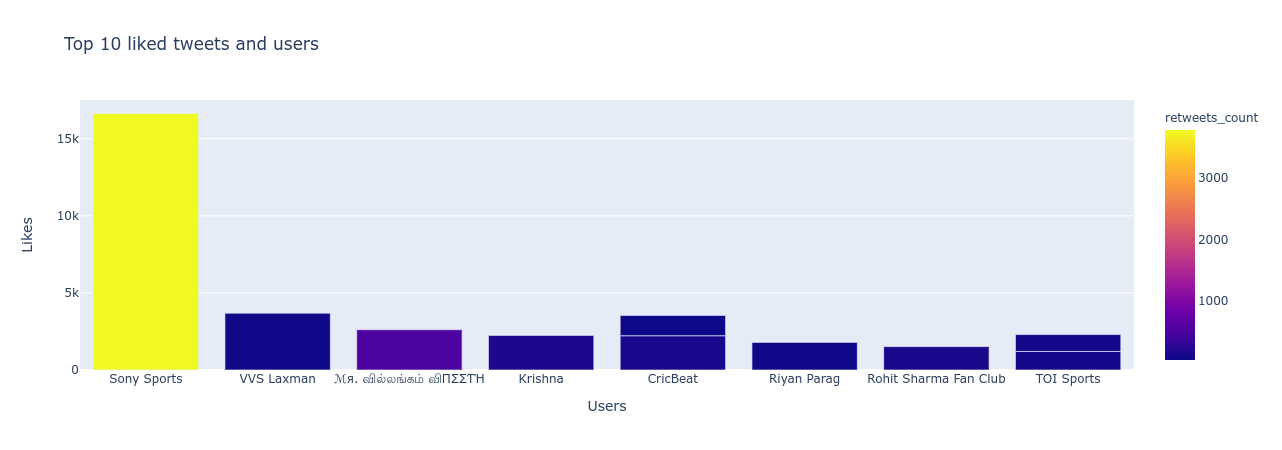

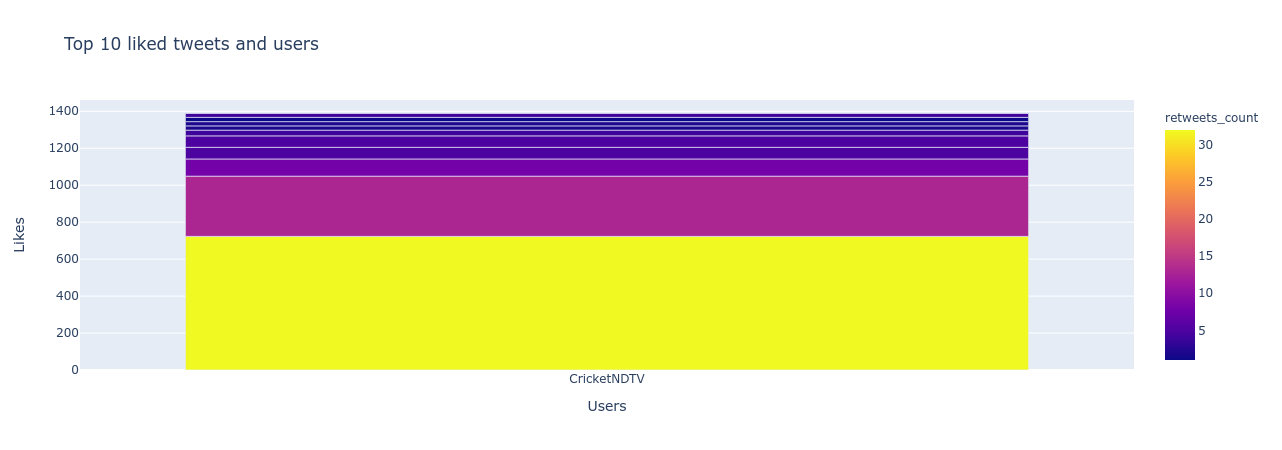

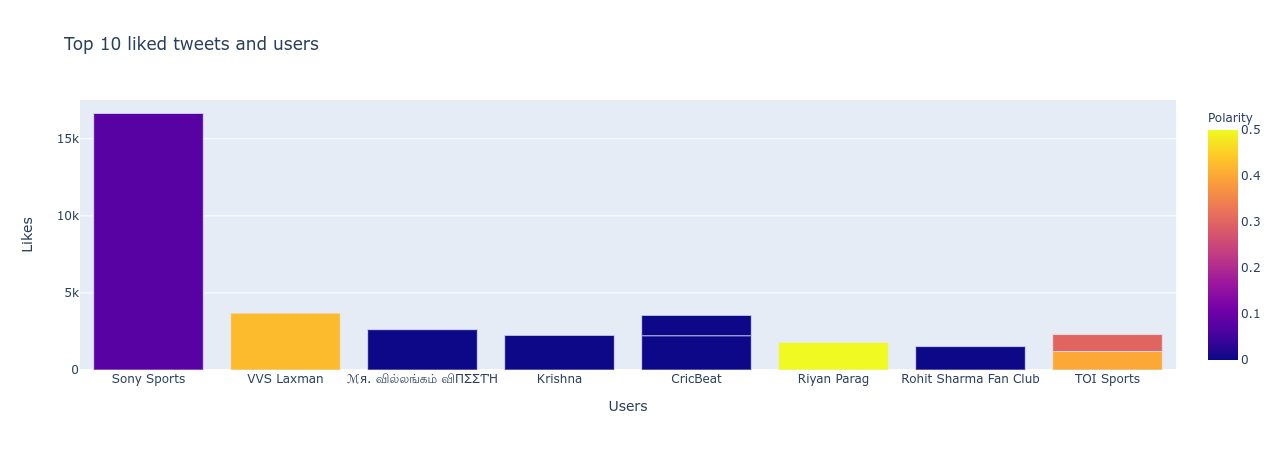

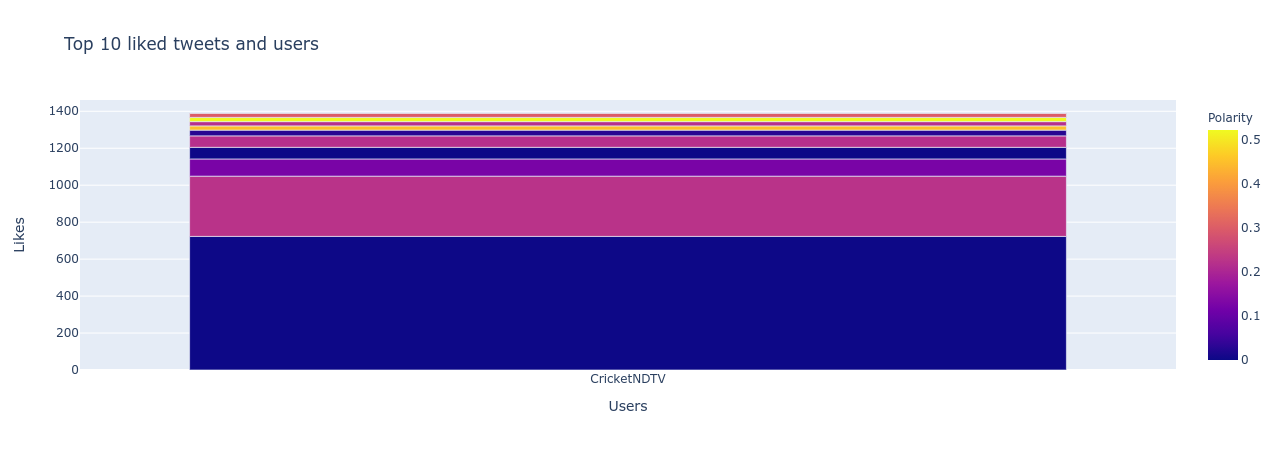

In [132]:
like_fig_unver = px.bar(top_10_unver , x='name',y='likes_count' ,labels={'likes_count':'Likes' , 'name':'Users'}, color='retweets_count',title='Top 10 liked tweets and users')
like_fig_unver.show()

like_fig_ver = px.bar(top_10_ver , x='name',y='likes_count',labels={'likes_count':'Likes' , 'name':'Users'},  color='retweets_count',title='Top 10 liked tweets and users')
like_fig_ver.show()

like_fig_unver_pol = px.bar(top_10_unver , x='name',y='likes_count',labels={'likes_count':'Likes' , 'name':'Users'}, color='Polarity',title='Top 10 liked tweets and users')
like_fig_unver_pol.show()

like_fig_ver_pol = px.bar(top_10_ver , x='name',y='likes_count',labels={'likes_count':'Likes' , 'name':'Users'},  color='Polarity',title='Top 10 liked tweets and users')
like_fig_ver_pol.show()

All plotly plots (to see them interactively look at the app running below)


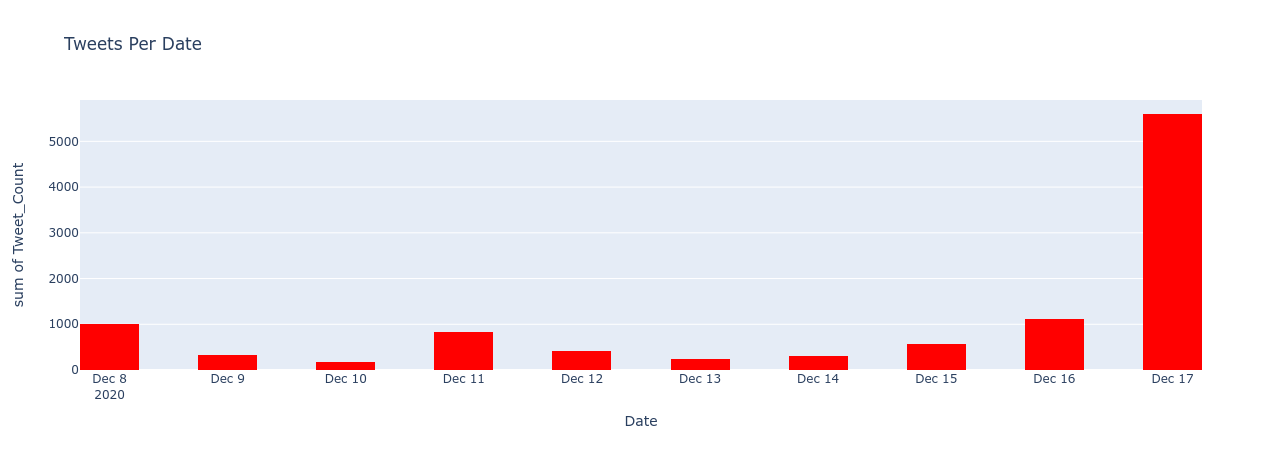

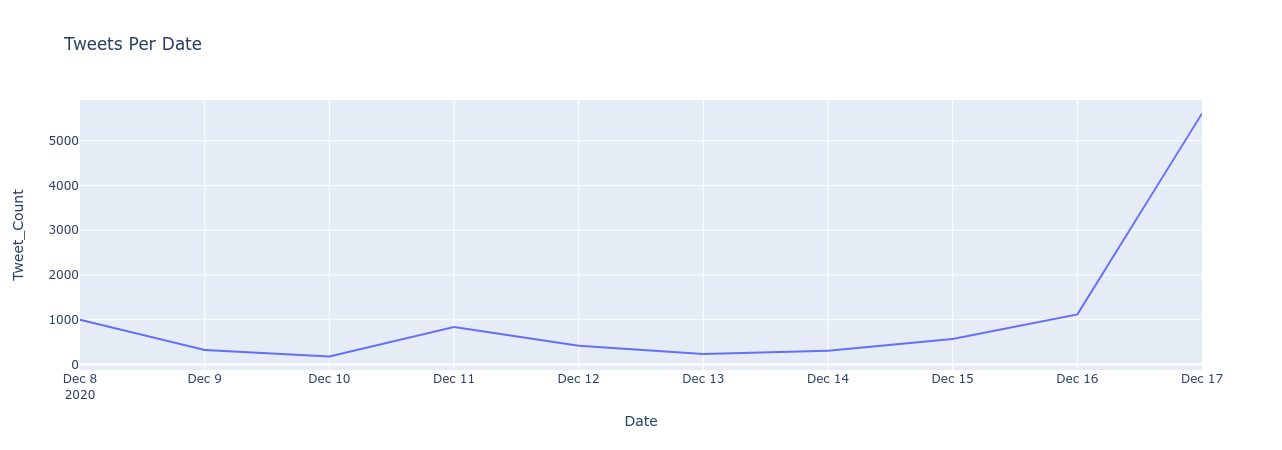

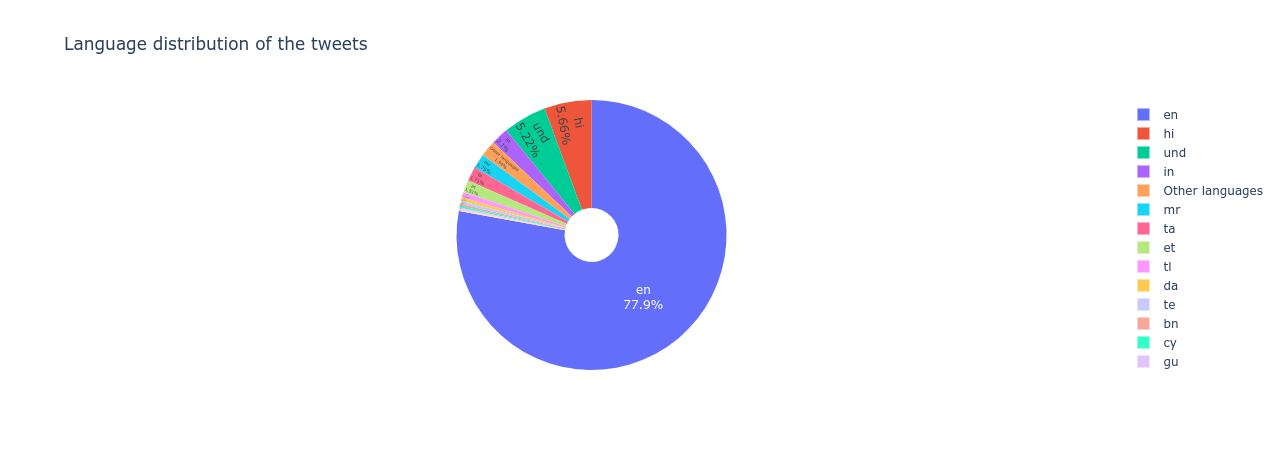

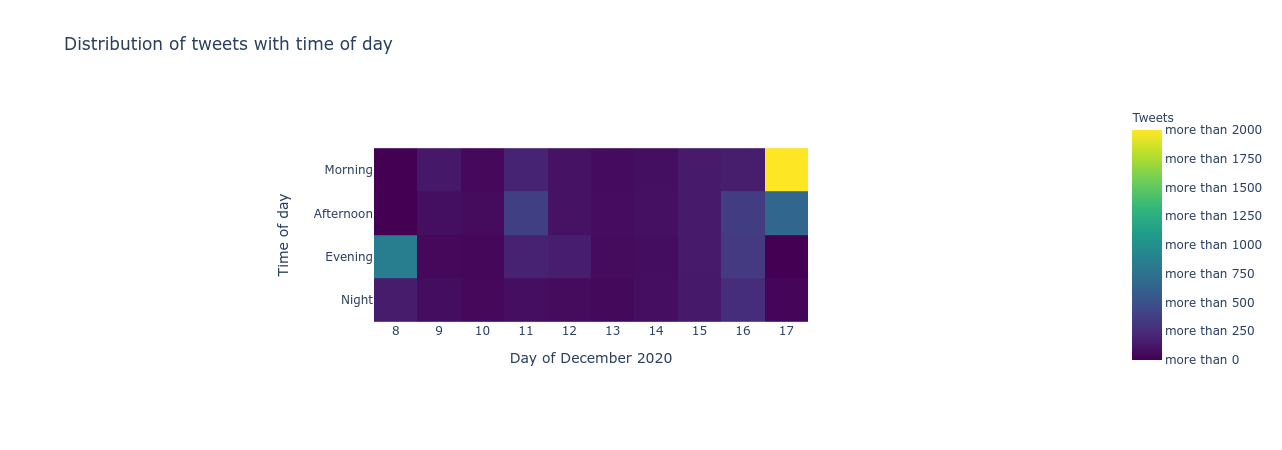

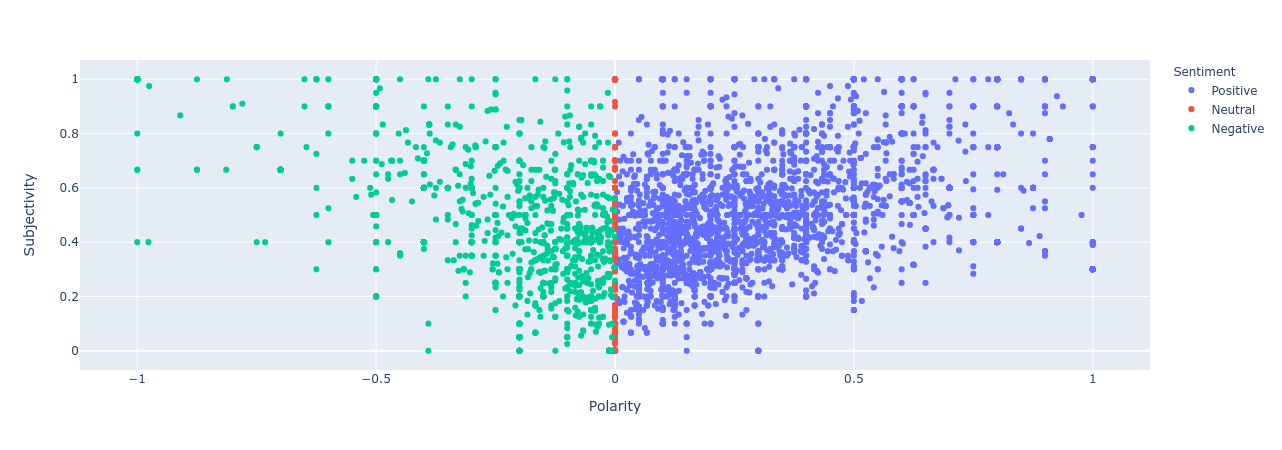

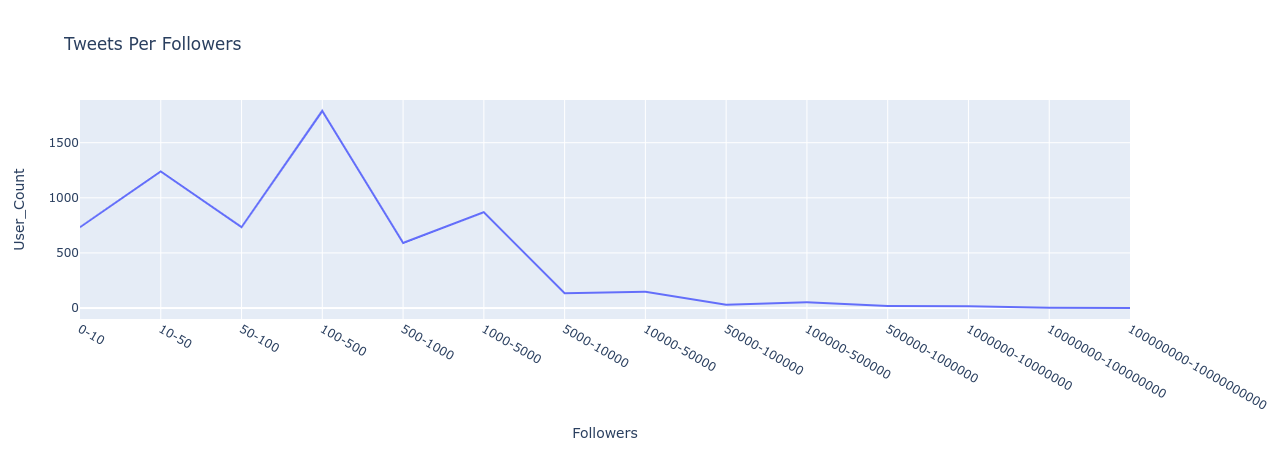

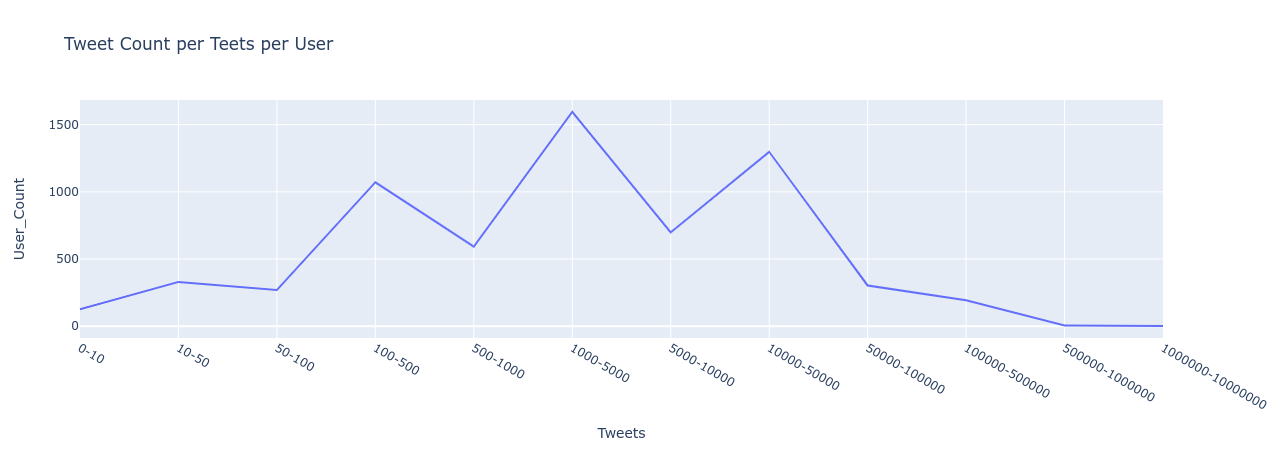

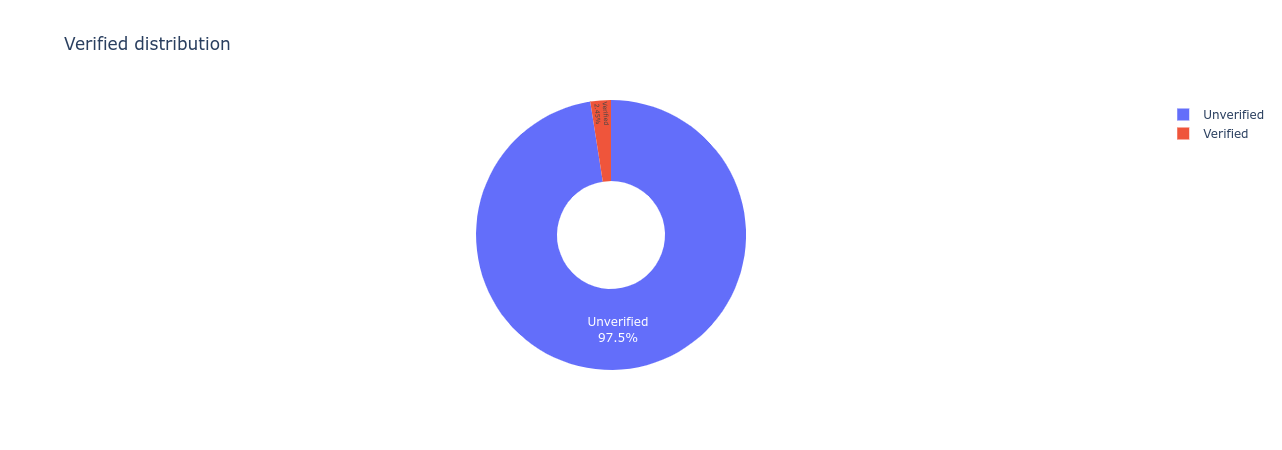

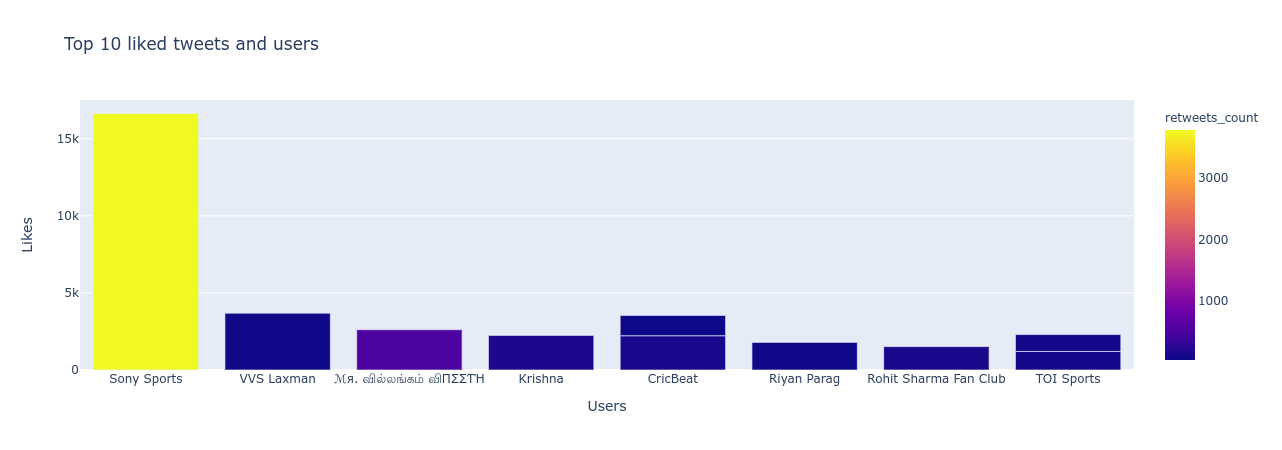

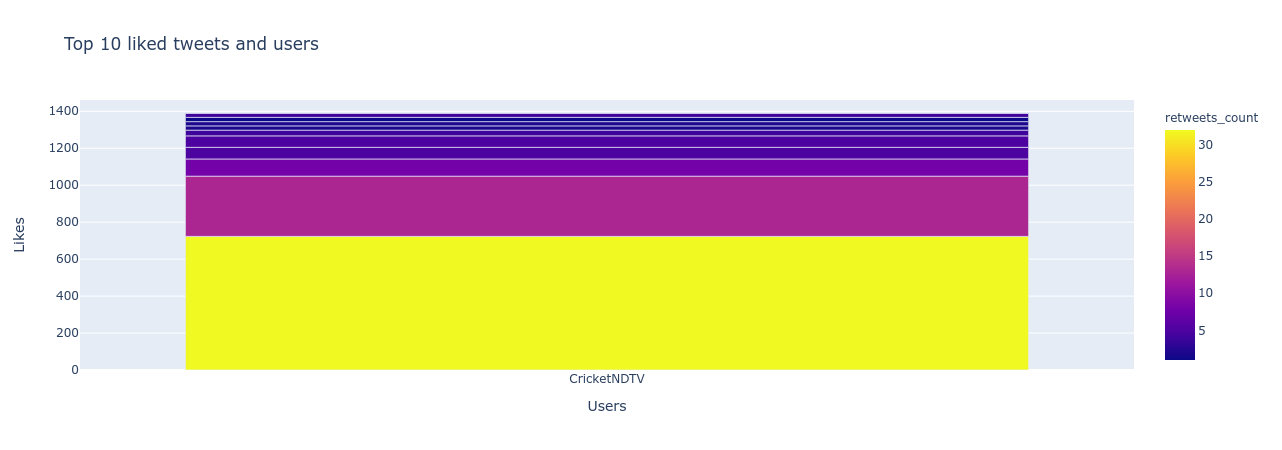

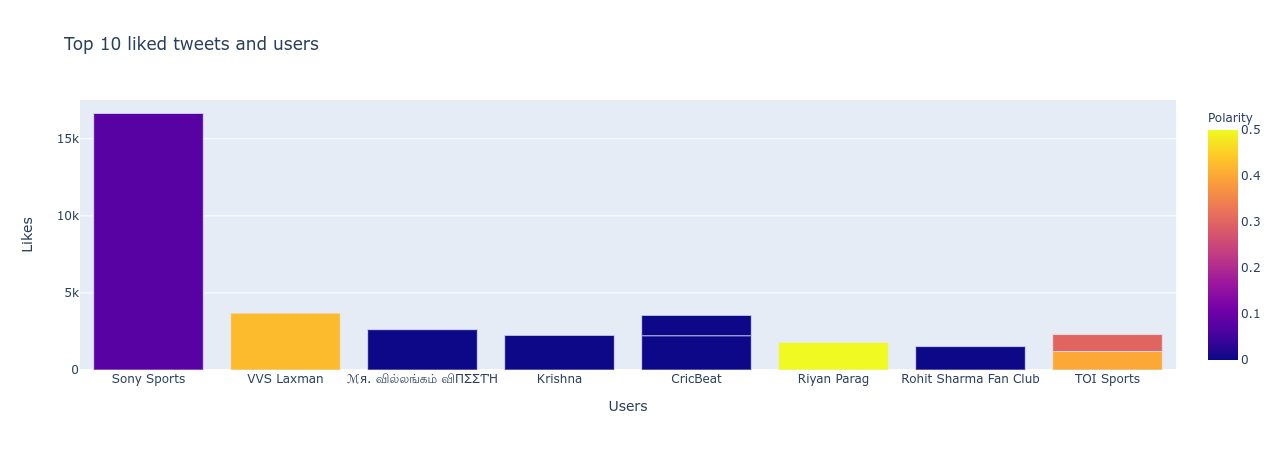

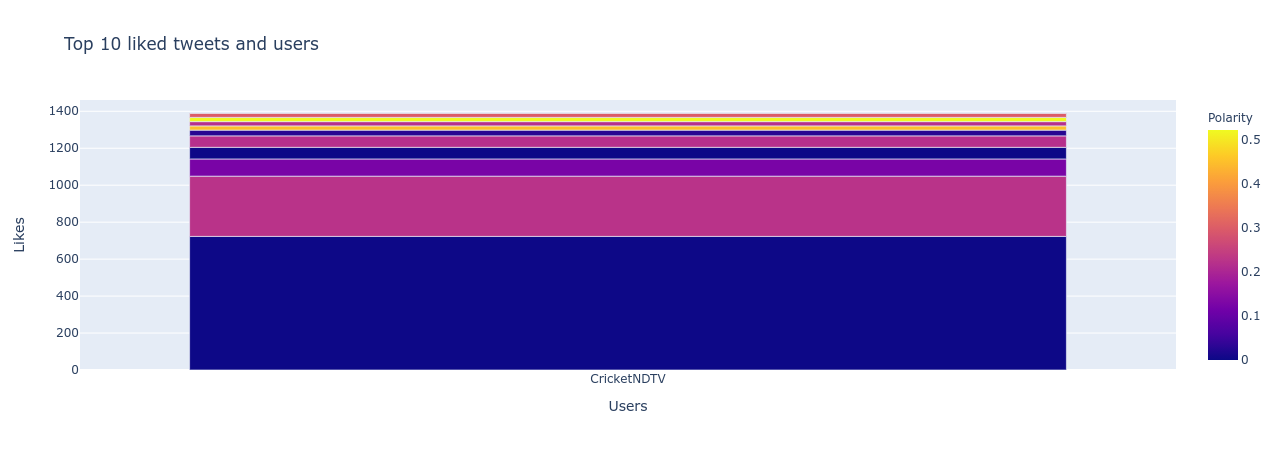

In [133]:
print("All plotly plots (to see them interactively look at the app running below)")

fig_hist = px.histogram(
       date_freq,
       title='Tweets Per Date',
       x="Date" , y="Tweet_Count",
        color_discrete_sequence=['red'],
    nbins=20
    )
    
fig_line = px.line(
   date_freq,
   title='Tweets Per Date',
   x="Date" , y="Tweet_Count"
)
    
fig_hist.show()
fig_line.show()

lang_fig.show()

heat_fig.show()

sub_pol_sent.show()

user_fig.show()
user_fig_tweet.show()

ver_fig.show()
like_fig_unver.show()
like_fig_ver.show()
like_fig_unver_pol.show()
like_fig_ver_pol.show()

In [140]:
# Layout of the dash app

app.layout = html.Div([
    
    html.Div([
        html.H1("Number of Tweets around the dates of the Match", style={'text-align': 'center'}) , 
        
        dcc.Dropdown(id="slct_mode",
                 options=[
                     {"label": "Histogram", "value": 0},
                     {"label": "Line", "value": 1},
                     ],
                 multi=False,
                 value=0,
                 style={'width': "30%"}
                 ),
        html.H3("Select mode of display (Histogram or Line)"),
        
        html.Br(),

        dcc.Graph(id='my_graph', figure={}),
        html.P("The largest peak is on 17 dec , indicating that the match might have happened then."),
        html.P("The smaller peak on 16 dec indicates how the users start getting active before the day of the match"),
        html.P("There were rises in activity on 11 and 8 Dec")
    ]) , 
    html.Br(),
    html.Hr(),
    html.Div([
        html.H1("Distribution of tweets according to language", style={'text-align': 'center'}),
        html.Br(),
        html.H3("Hover over the sections to highlight. Click on the legend to include/exclude a language"),
        dcc.Graph(id='my_graph2', figure=lang_fig),
        html.P("Majority of the tweets are in english with the second most being in Hindi")
        
    ]),
    html.Br(),
    html.Hr(),
    html.Div([
        html.H1("Distribution of tweets according to time of day", style={'text-align': 'center'}),
        html.Br(),
        dcc.Graph(id='my_graph3', figure=heat_fig),
        html.P("Major activity was on the Morning of 17 Dec"),
        html.P("Activity was either low or noticeable and that only during mornings and afternoons except on the Evening of 8th Dec")
    ]),
    html.Br(),
    html.Hr(),
    html.Div([
        html.H1("Corpus Sentiment Analysis", style={'text-align': 'center'}),
        dcc.Dropdown(id="corp_mode",
                 options=[
                     {"label": "Subjectivity - Polarity", "value": 'sub_pol'},
                     {"label": "Sentiment", "value": 'sent'},
                     {"label" : "Top 3 tweets" , "value" : "top"}
                     ],
                 multi=False,
                 value='sub_pol',
                 style={'width': "50%"}
                 ),
        dcc.Checklist(
            id="pol_id",
            options=[
                {'label': 'Positive/Negative', 'value': 'pos_neg'},
                {'label': 'Size by Likes', 'value': 'lksz'}
            ],
            value=[],
            style = {'display':'block'}
        )  ,
        html.Br(),
        dcc.Graph(id='my_graph4', figure={} , style={'display' : 'block'}),
        html.P("There are more positive tweets than negative tweets" , id='p_4' , style = {'display' : 'block'}),
        html.P("The maximum tweets are of the kind with average subjectivity around 0.5 and positive but lower polarity(not too positive)" , id='p_4_2' , style = {'display' : 'block'}),
        html.Div([
            dcc.RadioItems(id='pn',
                options=[
                    {'label': 'Positive Tweets', 'value': 'p'},
                    {'label': 'Negative', 'value': 'n'}
                ],
                value='p'
            ),
            html.H3(id='tw1',children={}),
            html.H3(id='tw2',children={}),
            html.H3(id='tw3',children={})
        ] , style={'display' : 'None'} , id='top_id')
    ]),
    html.Br(),
    html.Hr(),
    html.Div([
        html.H1("Users per Followers"),
        dcc.Graph(id='my_graph5' , figure=user_fig),
        html.P('The peak is towards the left end of the graph'),
        html.P('Most Users have followers in the 100-500 range with the second most in the 10-50 range')
    ]),
    html.Br(),
    html.Hr(),
    html.Div([
        html.H1("Users per Tweets"),
        dcc.Graph(id='my_graph6' , figure=user_fig_tweet),
        html.P('The peak is in the centre'),
        html.P('Most users have number of tweets in 1000-5000 range and second most in 10000-50000 range. This indicates the users are fairly active users')
    ]),
    html.Br(),
    html.Hr(),
    html.Div([
        html.H1("Users per Verification"),
        dcc.Graph(id='my_graph7' , figure=ver_fig),
        html.P('Majority is Unverified users'),
        html.P('Although number of verified users in this dataset is 160 which still indicates the interest of celebrities/famous users in this topic')
    ]),
    html.Br(),
    html.Hr(),
    html.Div([
        html.H1("Commonly spoken words/topics by users"),
        html.Img(src='data:image/png;base64,{}'.format(encoded_wc))
    ]),
    html.Br(),
    html.Hr(),
    html.Div([
        html.H1("Top liked tweets and their users"),
        html.H3("Choose the options to switch between verified unverified and polarity and retweets"),
        dcc.Graph(id='my_graph8' , figure={})
    ]),
    dcc.RadioItems(
    options=[
        {'label': 'Unverified Users', 'value': 'u'},
        {'label': 'Verified Users', 'value': 'v'}
    ],
    value='u',
        id='ver_mode'
    ),
    dcc.RadioItems(
    options=[
        {'label': 'Retweets', 'value': 'r'},
        {'label': 'Polarity', 'value': 'p'}
    ],
    value='r',
        id='col_mode'
    ),
    html.P('If the same user has multiple tweets the bar is coloured on top of each other showing the relation of the number of likes'),
    html.P('CricketNDTV was chosen as the only verified case as it had all top 10 liked tweets'),
    html.P('Unverified Users have many more likes than the verified ones therefore less popular accounts also tweeted things which people liked'),
    html.P('In both verified and unverified the most liked tweet has around neutral polarity or less positive polarity'),
    html.P('Unverified users have tweetd more positively then the verified news channel')
    
    
])

In [135]:
# Call back functions

@app.callback(
    [Output(component_id='my_graph', component_property='figure'),
    Output(component_id='my_graph4' , component_property='figure'),
    Output(component_id='pol_id' , component_property='style'),
    Output(component_id='top_id' , component_property = 'style'),
    Output(component_id='my_graph4' , component_property='style'),
    Output(component_id='tw1' , component_property='children'),
    Output(component_id='tw2' , component_property='children'),
    Output(component_id='tw3' , component_property='children'),
    Output(component_id='p_4' , component_property='style'),
    Output(component_id='p_4_2' , component_property='style')],
    [Input(component_id='slct_mode' , component_property='value'),
    Input(component_id='corp_mode' , component_property='value'),
    Input(component_id='pol_id' , component_property='value'),
    Input(component_id='pn' , component_property='value')]
)
def show_hist(mode_selected , corp_slct, sent_slct,pn):

    df_date_copy = date_freq.copy()
#     print("callback")
    # Plotly Express
    fig_hist = px.histogram(
       df_date_copy,
       title='Tweets Per Date',
       x="Date" , y="Tweet_Count",
        color_discrete_sequence=['red'],
    nbins=20
    )
    
    fig_line = px.line(
       df_date_copy,
       title='Tweets Per Date',
       x="Date" , y="Tweet_Count"
    )
    
    check_boxes = {'display':'block'}
    top = {'display' : 'None'}
    graph = {'display' : 'block'}
    t1 = pos_tweets[0]
    t2 = pos_tweets[1]
    t3 = pos_tweets[2]
    sct_p = {'display' : 'block'}
    
    
    sent_scatter = sub_pol
    corp_m = corp_slct
    if corp_m == 'sub_pol':
        sent_scatter = sub_pol
        check_boxes = {'display':'block'}
        top = {'display' : 'None'}
        graph = {'display' : 'block'}
        t1 = pos_tweets[0]
        t2 = pos_tweets[1]
        t3 = pos_tweets[2]
        sct_p = {'display' : 'block'}
        if len(sent_slct) == 1:
            if sent_slct[0] == 'pos_neg':
                sent_scatter = sub_pol_sent
            else:
                sent_scatter = sub_pol_sz
        elif len(sent_slct) == 2:
            sent_scatter = sub_pol_sent_sz
    
    elif corp_m == 'sent':
        top = {'display' : 'None'}
        check_boxes = {'display':'None'}
        graph = {'display' : 'block'}
        sct_p = {'display' : 'block'}
        t1 = pos_tweets[0]
        t2 = pos_tweets[1]
        t3 = pos_tweets[2]
        sent_scatter = sent_fig
        
    elif corp_m == 'top':
        check_boxes = {'display':'None'}
        top = {'display' : 'block'}
        graph = {'display' : 'None'}
        print(pn)
        if pn == 'p':
            t1 = pos_tweets[0]
            t2 = pos_tweets[1]
            t3 = pos_tweets[2]
        else:
            t1 = neg_tweets[0]
            t2 = neg_tweets[1]
            t3 = neg_tweets[2]
        
        sct_p = {'display' : 'None'}
    
    if not mode_selected:
        return fig_hist,sent_scatter,check_boxes,top,graph,t1,t2,t3,sct_p,sct_p
    else:
        return fig_line,sent_scatter,check_boxes,top,graph,t1,t2,t3,sct_p,sct_p

In [136]:
@app.callback(
    Output(component_id='my_graph8', component_property='figure'),
    [Input(component_id='ver_mode' , component_property='value'),
     Input(component_id='col_mode' , component_property='value')]
)

def user_graph(ver,col):
    final_fig = like_fig_unver
    if ver == 'u' and col == 'r':
        final_fig = like_fig_unver
    elif ver == 'u' and col == 'p':
        final_fig = like_fig_unver_pol
    elif ver == 'v' and col == 'r':
        final_fig = like_fig_ver
    else:
        final_fig = like_fig_ver_pol
    
    return final_fig
        

In [141]:
# Running the app inline mode so all graphs are visible here - if graphs are empty just re run all the cells
# To see them in a local host remove mode='inline'
if __name__ == '__main__':
    app.run_server(debug=True  , port=8052)

Dash app running on http://127.0.0.1:8052/
